## AXA Data Challenge
We have data from a motor insurance. We want to figure out if there will be a claim within the next 6 month (indicated by the is_claim column)
Figure out which variables might be usefull for predict. Experiment with the data, discuss with others to get the best result. 

### Features
- policy_id: Unique identifier of the policyholder
- policy_tenure: Time period of the policy
- age_of_car: Normalized age of the car in years
- age_of_policyholder: Normalized age of policyholder in years
- area_cluster: Area cluster of the policyholder
- population_density:Population density of the city (Policyholder City)
- make: Encoded Manufacturer/company of the car
- segment: Segment of the car (A/ B1/ B2/ C1/ C2)
- model: Encoded name of the car
- fuel_type: Type of fuel used by the car
- max_torque: Maximum Torque generated by the car (Nm@rpm)
- max_power: Maximum Power generated by the car (bhp@rpm)
- engine_type: Type of engine used in the car
- airbags: Number of airbags installed in the car
- is_esc: Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.
- is_adjustable_steering: Boolean flag indicating whether the steering wheel of the car is adjustable or not.
- is_tpms: Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.
- is_parking_sensors: Boolean flag indicating whether parking sensors are present in the car or not.
- is_parking_camera: Boolean flag indicating whether the parking camera is present in the car or not.
- rear_brakes_type: Type of brakes used in the rear of the car
- displacement: Engine displacement of the car (cc)
- cylinder: Number of cylinders present in the engine of the car
- transmission_type: Transmission type of the car
- gear_box: Number of gears in the car
- steering_type: Type of the power steering present in the car
- turning_radius: The space a vehicle needs to make a certain turn (Meters)
- length: Length of the car (Millimetre)
- width: Width of the car (Millimetre)
- height: Height of the car (Millimetre)
- gross_weight: The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)
- is_front_fog_lights: Boolean flag indicating whether front fog lights are available in the car or not.
- is_rear_window_wiper: Boolean flag indicating whether the rear window wiper is available in the car or not.
- is_rear_window_washer: Boolean flag indicating whether the rear window washer is available in the car or not.
- is_rear_window_defogger: Boolean flag indicating whether rear window defogger is available in the car or not.
- is_brake_assist: Boolean flag indicating whether the brake assistance feature is available in the car or not.
- is_power_door_lock: Boolean flag indicating whether a power door lock is available in the car or not.
- is_central_locking: Boolean flag indicating whether the central locking feature is available in the car or not.
- is_power_steering: Boolean flag indicating whether power steering is available in the car or not.
- is_driver_seat_height_adjustable: Boolean flag indicating whether the height of the driver seat is adjustable or not.
- is_day_night_rear_view_mirror: Boolean flag indicating whether day & night rearview mirror is present in the car or not.
- is_ecw: Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.
- is_speed_alert: Boolean flag indicating whether the speed alert system is available in the car or not.
- ncap_rating: Safety rating given by NCAP (out of 5)
- is_claim: Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.

In [13]:
# Import required packages
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import plotly.express as px

In [14]:
# Load Dataset
url="./../data/train_qWM28Yl.csv"
insurance_claims=pd.read_csv(url)
train, test = train_test_split(insurance_claims,  test_size=0.33, stratify=insurance_claims["is_claim"])

In [15]:
# Let's look into the data
insurance_claims.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [16]:
# Fit a regression model to predict if there will be a claim in the upcoming year. 
# Syntax: https://www.statsmodels.org/dev/example_formulas.html
# C is to indicate that the variable is a categrial
# A*B indicates that there is a interaction between A and B
# np.log(A), np.exp(A), A**2 indicated a non linear realtion

model = smf.glm(formula  = 'is_claim ~ age_of_policyholder + population_density + age_of_car', data=train, family=sm.families.Binomial())
results = model.fit()
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_claim   No. Observations:                39256
Model:                            GLM   Df Residuals:                    39252
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9304.5
Date:                Fri, 09 May 2025   Deviance:                       18609.
Time:                        13:58:25   Pearson chi2:                 3.92e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.001438
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.7131    

In [17]:
# predict data from the test set
prediction= results.predict(test)>np.mean(train["is_claim"])

0.12632354295184606


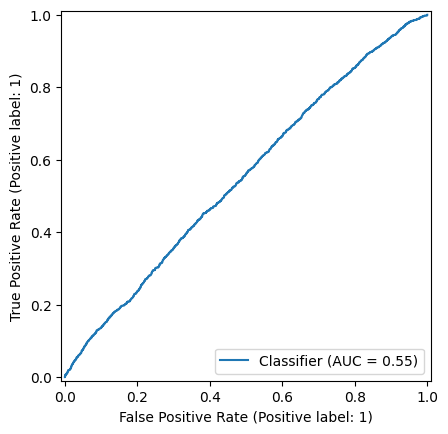

In [18]:
#calculate F1 score, closer to 1 is good
print( f1_score(test["is_claim"], prediction ))

# If the curve is close to the upper left the model is good
RocCurveDisplay.from_predictions(
    test["is_claim"], results.predict(test))
plt.show()

### Useful plots to detect realtion between variable and target

<Axes: title={'center': 'policy_tenure'}, xlabel='is_claim'>

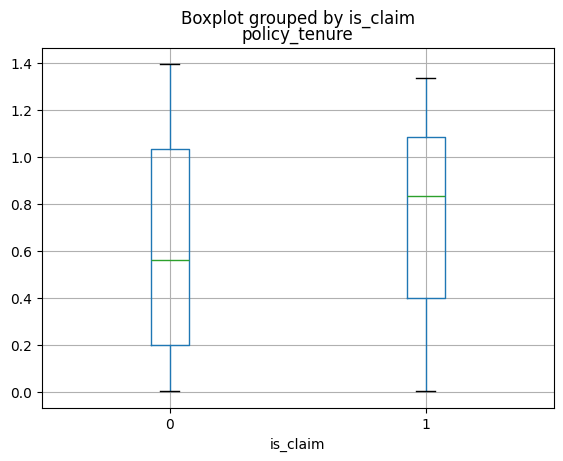

In [19]:
# Effect of policy_tenure on likelihood of claim
insurance_claims.boxplot(by='is_claim', column='policy_tenure')


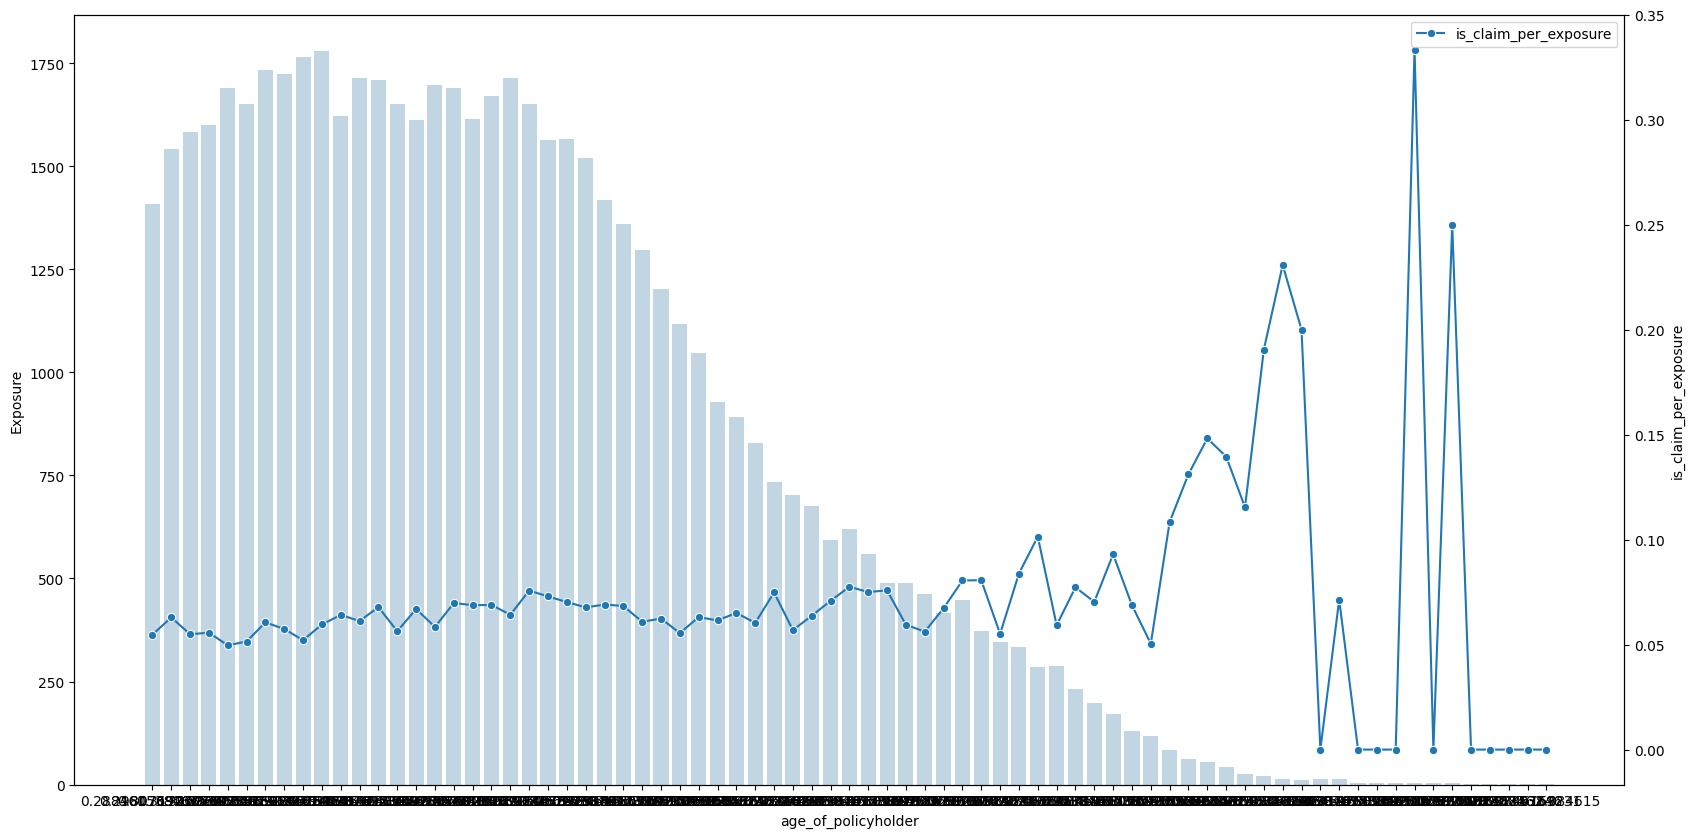

In [20]:
from utils import plot_dimension
insurance_claims['fitted']= results.predict(insurance_claims)

plot_dimension(["is_claim"], "age_of_policyholder", insurance_claims)